# 层次聚类（Hierarchical Clustering）详解

层次聚类是一种**无监督学习算法**，用于将数据对象分组为层次结构的簇（clusters），特别适用于需要了解数据**层次关系或嵌套结构**的场景。

---

## 一、基本概念

层次聚类通过**构建一个树状结构（称为树状图 dendrogram）**来表达数据之间的嵌套关系。主要分为两类：

1. **凝聚型层次聚类（Agglomerative）**：自底向上，每个样本先看作一个簇，逐步合并；
2. **分裂型层次聚类（Divisive）**：自顶向下，所有样本为一个簇，逐步划分。

**最常用的是凝聚型层次聚类。**

---

## 二、算法流程（以凝聚型为例）

1. **初始化**：每个样本点为一个单独的簇；
2. **计算距离矩阵**：每两个簇之间的距离；
3. **合并最近的两个簇**；
4. **更新距离矩阵**；
5. **重复步骤 3-4**，直到只剩下一个簇或达到指定的簇数。

---

## 三、簇间距离的定义（Linkage 方法）

不同的**Linkage方法**决定了聚类结果的差异，常见的有：

1. **单链接（Single Linkage）**：
   $$
   D(A, B) = \min_{a \in A, b \in B} \text{dist}(a, b)
   $$

2. **全链接（Complete Linkage）**：
   $$
   D(A, B) = \max_{a \in A, b \in B} \text{dist}(a, b)
   $$

3. **平均链接（Average Linkage）**：
   $$
   D(A, B) = \frac{1}{|A||B|} \sum_{a \in A, b \in B} \text{dist}(a, b)
   $$

4. **质心链接（Centroid Linkage）**：
   $$
   D(A, B) = \| \mu_A - \mu_B \|
   $$
   其中 $$\mu_A, \mu_B$$ 分别为簇 A 和 B 的质心。

---

## 四、树状图（Dendrogram）

树状图用于可视化层次聚类过程：

- **X轴**：表示样本；
- **Y轴**：表示合并两个簇时的距离；
- 水平线越高，表示两个簇之间越不相似；
- **剪枝（cutting the dendrogram）**：选择一个阈值水平，即可得到最终的聚类结果。

---

## 五、优缺点分析

### 优点：

- 不需要预先指定簇的个数（可通过剪枝确定）；
- 适用于揭示数据的层次结构；
- 可视化效果好（树状图）。

### 缺点：

- 计算复杂度高（时间复杂度约 $$O(n^3)$$，空间复杂度 $$O(n^2)$$）；
- 对噪声和离群点敏感；
- 一旦合并无法撤销（不可回溯）。

---

## 六、与K-Means对比

| 特性               | 层次聚类             | K-Means                |
|--------------------|----------------------|------------------------|
| 聚类数量           | 不需预先设定         | 必须设定K              |
| 聚类结构           | 树状结构             | 扁平划分               |
| 算法复杂度         | 高                   | 相对较低               |
| 可视化             | 树状图（可剪枝）     | 聚类中心图             |
| 对离群点敏感性     | 高                   | 中等                   |

---

## 七、Python 示例（使用 Scikit-learn）

```python
import numpy as np
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 生成样本数据
X, _ = make_blobs(n_samples=30, centers=3, random_state=42)

# 层次聚类
Z = linkage(X, method='ward')  # 也可以选择 'single', 'complete', 'average'

# 绘制树状图
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
```

---

## 八、总结

层次聚类是一种结构清晰、直观的聚类方法，特别适合于数据层次关系探索和可视化分析。但在大规模数据和对速度敏感的场景中，需注意其计算复杂度。

---

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy.io
from sklearn.cluster import AgglomerativeClustering

In [15]:
def loaddata():
    data = np.loadtxt('data/cluster_data.csv', delimiter=',')
    return data
X = loaddata()

# linkage取值
## ward Ward最小方差
## complete 最大化类间距离
## average 平均类内距离
## single 最小类内距离

In [16]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X)


AgglomerativeClustering(n_clusters=3)

In [17]:
print(model.labels_)

[1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1]


<function matplotlib.pyplot.show(close=None, block=None)>

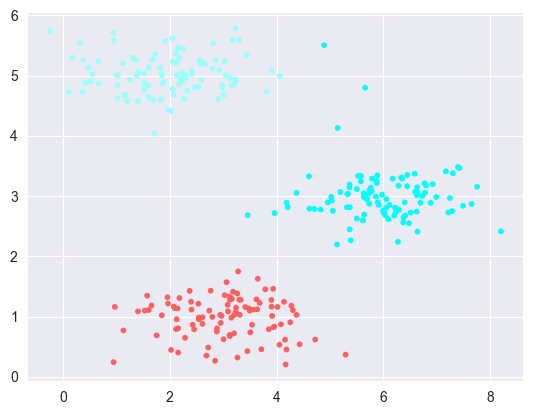

In [20]:
cm_dark = mpl.colors.ListedColormap(['#ff6060', '#ff80ff', '#9afeff', '#40e0d0', '#00ffff'])
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=10, cmap=cm_dark)
plt.show